# Exploratory Data Analysis of Diabetes

In this Project we are going to do `Exploratory Data analysis` of `Diabetes` using `Pyspark`.

## Reading and Exploring Data

In [1]:
from pyspark.sql import SparkSession

In [20]:
spark = SparkSession.builder.master('local[*]').appName('EDA').getOrCreate()

In [49]:
df = spark.read.csv('diabetes.csv', header=True, inferSchema=True)

In [39]:
df.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [5]:
df.printSchema()  # View the schema

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [6]:
df.count()

768

In [7]:
len(df.columns)

9

Here in Data there are 768 rows and 9 columns.

In [8]:
df.describe().toPandas()
# Get summary

,summary,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,count,768,768,768,768,768,768,768,768,768
1,mean,3.8450520833333335,120.89453125,69.10546875,20.536458333333332,79.79947916666667,31.992578124999977,0.4718763020833327,33.240885416666664,0.3489583333333333
2,stddev,3.36957806269887,31.97261819513622,19.355807170644777,15.952217567727642,115.24400235133803,7.884160320375441,0.331328595012775,11.760231540678689,0.476951377242799
3,min,0,0,0,0,0,0.0,0.078,21,0
4,max,17,199,122,99,846,67.1,2.42,81,1


In [9]:
df.groupBy('Outcome').count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



Here data contains 268 diabetic peson and 500 non-diabetic person.

In [10]:
from pyspark.sql.functions import isnan, when, count, col

In [11]:
df.select([count(when(isnan(c) , c)).alias(c) for c in df.columns]).show()

+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|          0|      0|            0|            0|      0|  0|                       0|  0|      0|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+



There are not any null value in  our Data.

## Data Visualzation
Here we are going to Data Visualization by which we are able to understand Data more perfect.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
pandas_df = df.toPandas()

In [14]:
pandas_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### `Pregnancies`

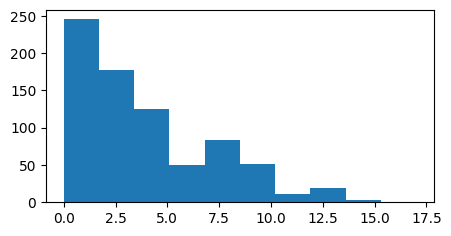

In [15]:
fig, ax = plt.subplots(figsize =(5, 2.5))
ax.hist(pandas_df['Pregnancies']);

Here we can see that in our dataset have some value ehich has more than 5 pregnancies and maximum number of customer have 0 pregnancies.

Let's Plot all the columns st once.

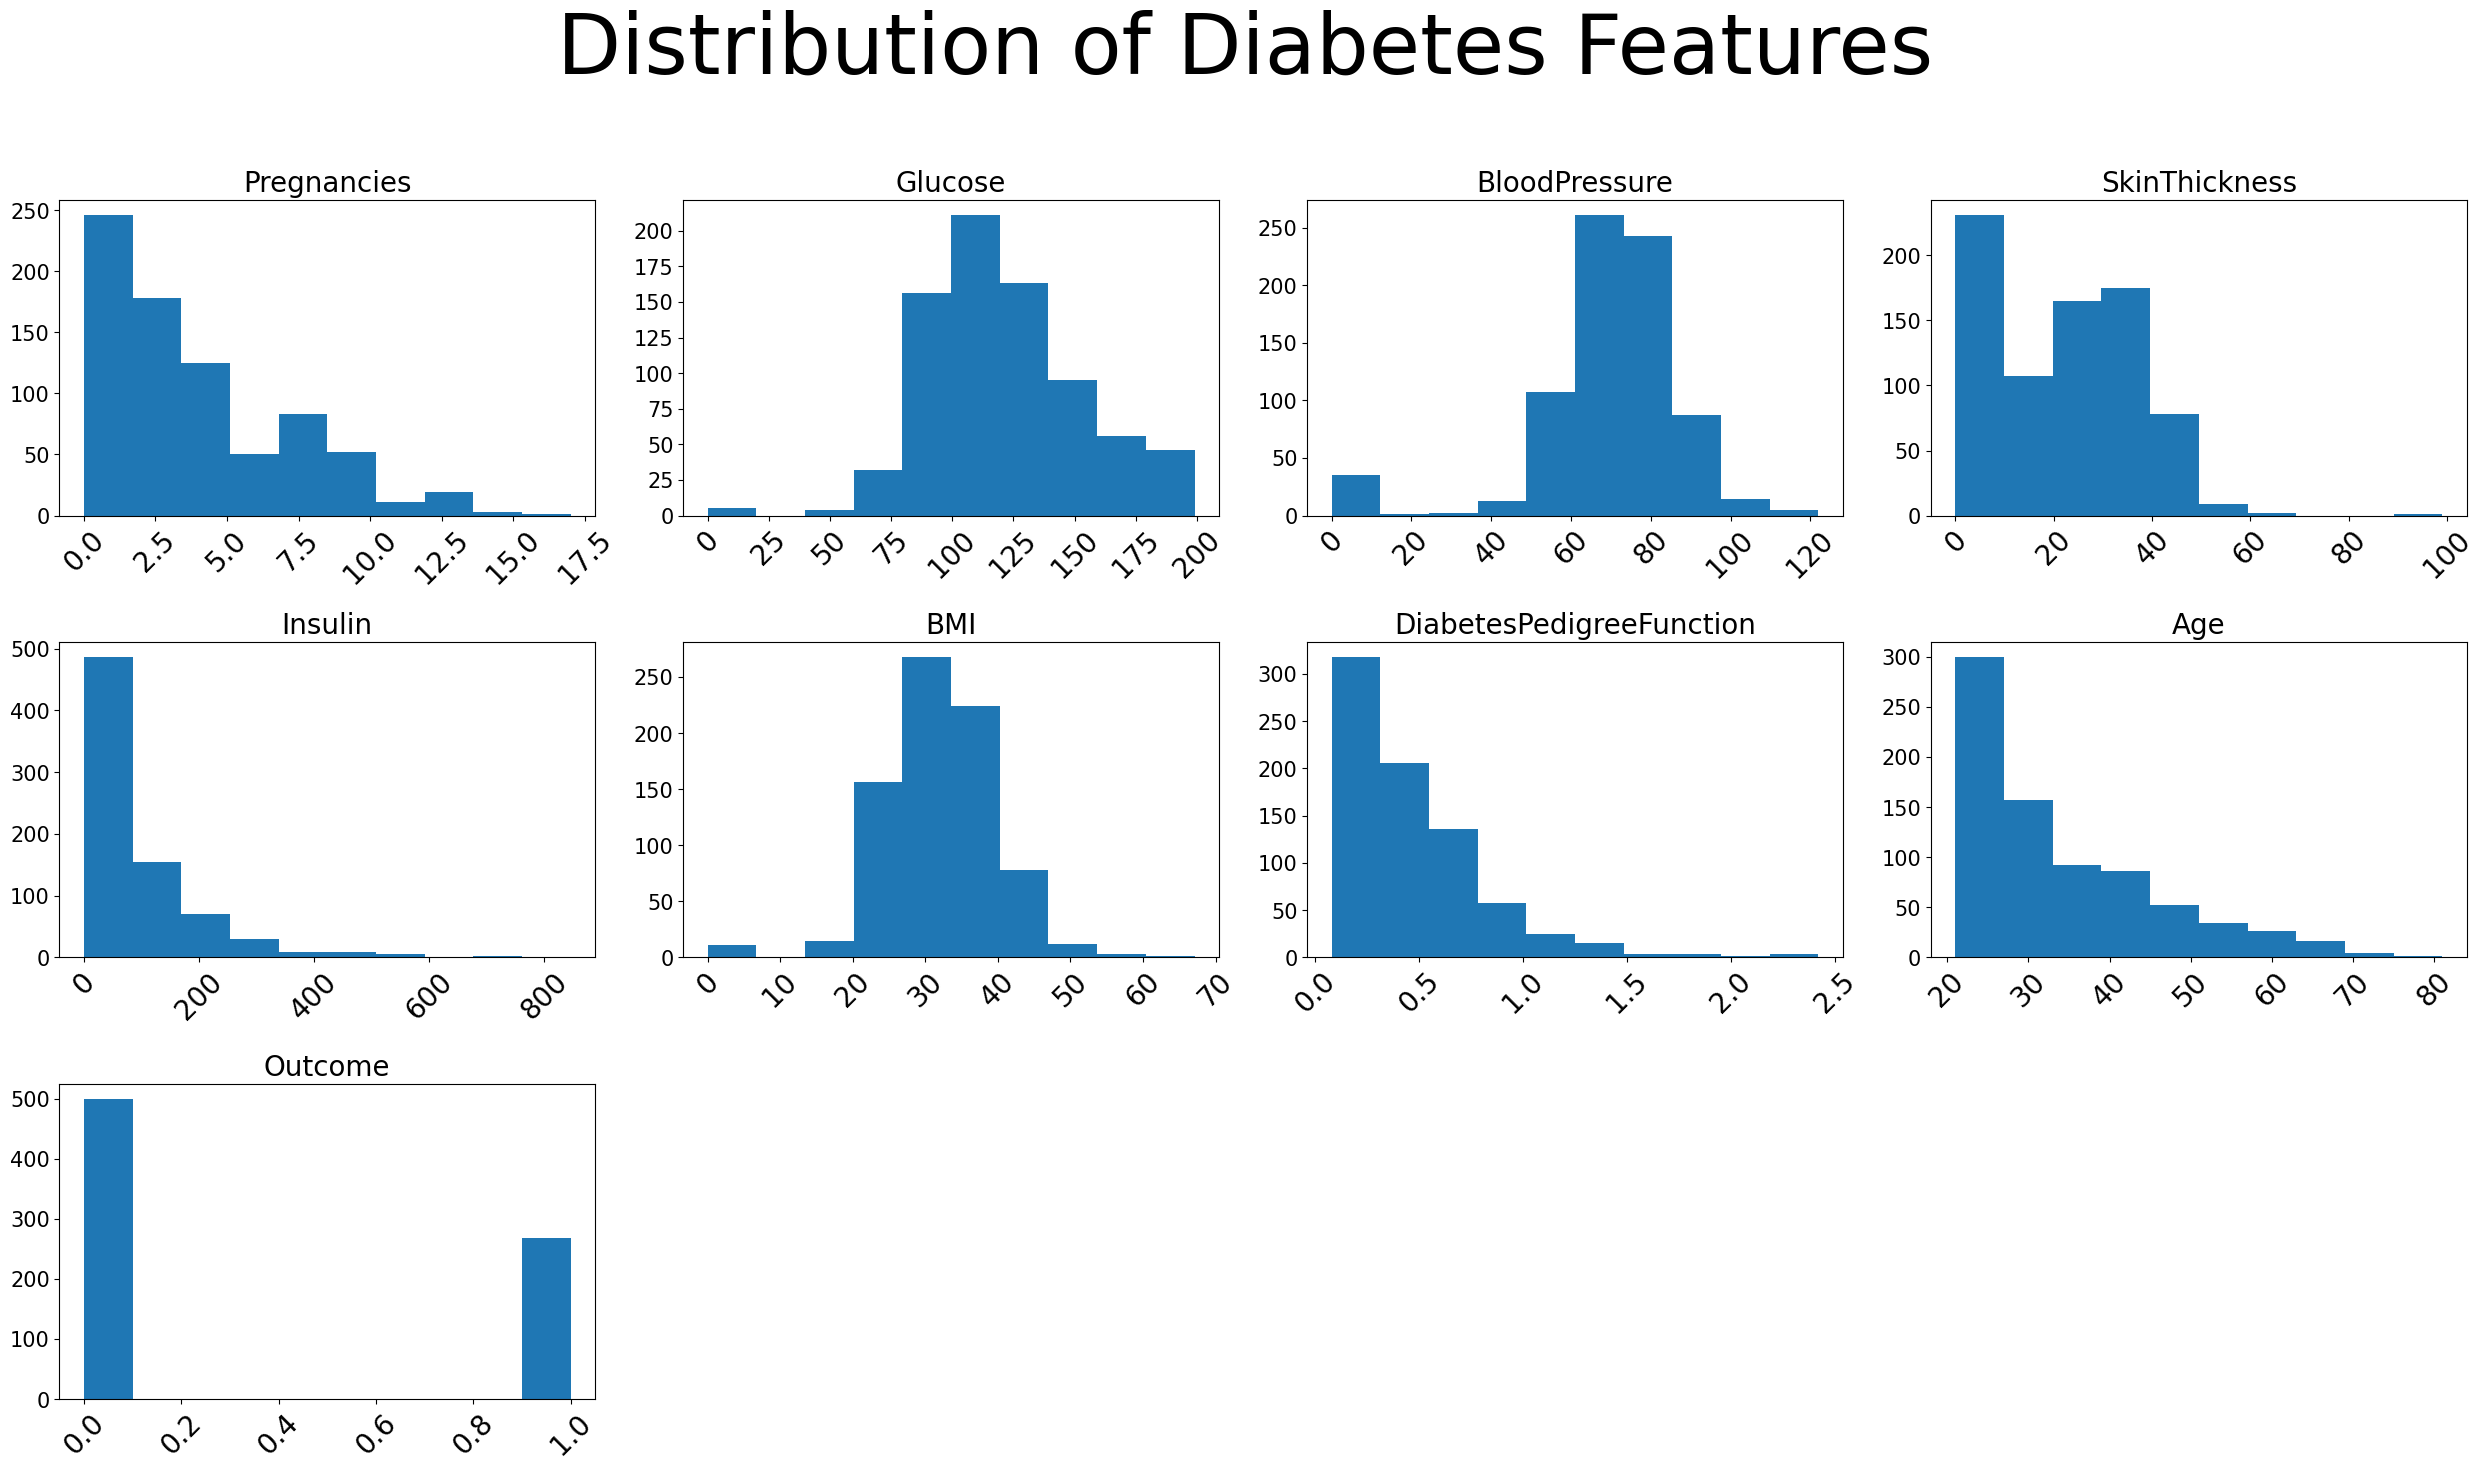

In [16]:
fig = plt.figure(figsize=(25, 15))
st = fig.suptitle("Distribution of Diabetes Features", fontsize=60, verticalalignment="center")
for col, num in zip(df.toPandas().describe().columns, range(1,11)):
    ax = fig.add_subplot(3,4, num)
    ax.hist(df.toPandas()[col])
    plt.grid(False)
    plt.xticks(rotation=45, fontsize=20)
    plt.yticks(fontsize=15)
    plt.title(col, fontsize=20)

plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85, hspace=0.4)
plt.show()

- Glucose:- Maximum Number of `Glucose level` are between `100` to `125`.

- BloodPressure:- Maximum number of BloodPressure are between `60` to `80`.

- SkilnThickness:- Maximum number of `SkinThickness` lie on `0` to `10`.

- Insulin:- Maximum Number of `Insulin level` are between `0` to around `80`.

- BMI:- Maximum Number of `BMI` are at 30.

- Age:- Maximum Number of person are between `20` to `28`.

## Training Model

In [40]:
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler

In [42]:
df.columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [50]:
assembler = VectorAssembler(
    inputCols = ['Pregnancies',
                 'Glucose',
                 'BloodPressure',
                 'SkinThickness',
                 'Insulin',
                 'BMI',
                 'DiabetesPedigreeFunction',
                 'Age'],
    outputCol='features'
)

In [51]:
output = assembler.transform(df)

In [53]:
output.select('features', 'Outcome').show()

+--------------------+-------+
|            features|Outcome|
+--------------------+-------+
|[6.0,148.0,72.0,3...|      1|
|[1.0,85.0,66.0,29...|      0|
|[8.0,183.0,64.0,0...|      1|
|[1.0,89.0,66.0,23...|      0|
|[0.0,137.0,40.0,3...|      1|
|[5.0,116.0,74.0,0...|      0|
|[3.0,78.0,50.0,32...|      1|
|[10.0,115.0,0.0,0...|      0|
|[2.0,197.0,70.0,4...|      1|
|[8.0,125.0,96.0,0...|      1|
|[4.0,110.0,92.0,0...|      0|
|[10.0,168.0,74.0,...|      1|
|[10.0,139.0,80.0,...|      0|
|[1.0,189.0,60.0,2...|      1|
|[5.0,166.0,72.0,1...|      1|
|[7.0,100.0,0.0,0....|      1|
|[0.0,118.0,84.0,4...|      1|
|[7.0,107.0,74.0,0...|      1|
|[1.0,103.0,30.0,3...|      0|
|[1.0,115.0,70.0,3...|      1|
+--------------------+-------+
only showing top 20 rows



In [54]:
final_data = output.select("features","Outcome")

In [55]:
train_data, test_data = final_data.randomSplit([0.7, 0.3], seed=42)

In [58]:
train_data.show(5)

+--------------------+-------+
|            features|Outcome|
+--------------------+-------+
|(8,[0,1,6,7],[2.0...|      0|
|(8,[0,1,6,7],[2.0...|      0|
|(8,[0,1,6,7],[6.0...|      0|
|(8,[0,1,6,7],[7.0...|      0|
|(8,[0,1,6,7],[10....|      1|
+--------------------+-------+
only showing top 5 rows



In [59]:
test_data.show(5)

+--------------------+-------+
|            features|Outcome|
+--------------------+-------+
|(8,[0,1,6,7],[3.0...|      0|
|(8,[1,5,6,7],[73....|      0|
|(8,[1,5,6,7],[117...|      0|
|(8,[1,5,6,7],[119...|      1|
|(8,[1,5,6,7],[145...|      1|
+--------------------+-------+
only showing top 5 rows



## Logistic Regression

In [56]:
from pyspark.ml.classification import LogisticRegression

In [60]:
log_r = LogisticRegression(labelCol='Outcome')

In [61]:
model = log_r.fit(train_data)

In [62]:
import pandas as pd

In [68]:
coeff = model.coefficients
column_name = ['Pregnancies',
                 'Glucose',
                 'BloodPressure',
                 'SkinThickness',
                 'Insulin',
                 'BMI',
                 'DiabetesPedigreeFunction',
                 'Age']

In [69]:
dataframe = pd.DataFrame({'Columns':column_name, 'coefficient':coeff})

In [70]:
dataframe

,Columns,coefficient
0,Pregnancies,0.129666
1,Glucose,0.031716
2,BloodPressure,-0.012357
3,SkinThickness,-0.002430
4,Insulin,-0.000488
5,BMI,0.078703
6,DiabetesPedigreeFunction,0.968804
7,Age,0.016100


In [71]:
model.intercept

-7.780002895340823

In [66]:
result = model.evaluate(test_data)

In [72]:
result.accuracy

0.7839195979899497

Here Our model ios 78% accurate.

In [75]:
prediction = model.transform(test_data)

In [78]:
prediction.select('Outcome', 'prediction', 'probability').show(10)

+-------+----------+--------------------+
|Outcome|prediction|         probability|
+-------+----------+--------------------+
|      0|       0.0|[0.98701562005124...|
|      0|       0.0|[0.95564876204787...|
|      0|       1.0|[0.44959963278122...|
|      1|       0.0|[0.71763975778231...|
|      1|       1.0|[0.19671053272649...|
|      1|       1.0|[0.20512755083506...|
|      0|       0.0|[0.98445220430224...|
|      0|       0.0|[0.94379333917630...|
|      0|       0.0|[0.93480503874971...|
|      0|       0.0|[0.88105294103852...|
+-------+----------+--------------------+
only showing top 10 rows



## Random Forest

In [83]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [80]:
rf = RandomForestClassifier(labelCol="Outcome", numTrees=100)

In [81]:
rf_model = rf.fit(train_data)

In [82]:
rf_predictions = rf_model.transform(test_data)

In [84]:
evaluator = BinaryClassificationEvaluator(labelCol="Outcome")

In [85]:
rf_auc = evaluator.evaluate(rf_predictions)

In [86]:
rf_auc

0.8180602006688966

Here with Random Forest our Model is 81% accurate.

## Decision Tree

In [87]:
from pyspark.ml.classification import DecisionTreeClassifier

In [88]:
dt = DecisionTreeClassifier(labelCol="Outcome")

In [89]:
dt_model = dt.fit(train_data)

In [90]:
dt_predictions = dt_model.transform(test_data)

In [91]:
dt_auc = evaluator.evaluate(dt_predictions)

In [92]:
print("Decision Tree AUC:", dt_auc)

Decision Tree AUC: 0.6408026755852843


Decision tree is more bad than LogisticRegression.

# Saving the Best Model

As we Know that Random forest is 81% accurate so we are going to save that model.

In [99]:
path = "D:/Pyspark Projects/model.pkl"
rf_model.save(path)

Py4JJavaError: An error occurred while calling o4994.save.
: java.lang.RuntimeException: java.io.FileNotFoundException: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset. -see https://wiki.apache.org/hadoop/WindowsProblems
	at org.apache.hadoop.util.Shell.getWinUtilsPath(Shell.java:735)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:270)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:286)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:978)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkOneDirWithMode(RawLocalFileSystem.java:660)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:700)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:699)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:699)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:699)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.ChecksumFileSystem.mkdirs(ChecksumFileSystem.java:788)
	at org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter.setupJob(FileOutputCommitter.java:356)
	at org.apache.hadoop.mapred.FileOutputCommitter.setupJob(FileOutputCommitter.java:131)
	at org.apache.hadoop.mapred.OutputCommitter.setupJob(OutputCommitter.java:265)
	at org.apache.spark.internal.io.HadoopMapReduceCommitProtocol.setupJob(HadoopMapReduceCommitProtocol.scala:188)
	at org.apache.spark.internal.io.SparkHadoopWriter$.write(SparkHadoopWriter.scala:79)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopDataset$1(PairRDDFunctions.scala:1091)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopDataset(PairRDDFunctions.scala:1089)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$4(PairRDDFunctions.scala:1062)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1027)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$3(PairRDDFunctions.scala:1009)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1008)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$2(PairRDDFunctions.scala:965)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:963)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$2(RDD.scala:1599)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1599)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$1(RDD.scala:1585)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1585)
	at org.apache.spark.ml.util.DefaultParamsWriter$.saveMetadata(ReadWrite.scala:413)
	at org.apache.spark.ml.tree.EnsembleModelReadWrite$.saveImpl(treeModels.scala:473)
	at org.apache.spark.ml.classification.RandomForestClassificationModel$RandomForestClassificationModelWriter.saveImpl(RandomForestClassifier.scala:406)
	at org.apache.spark.ml.util.MLWriter.save(ReadWrite.scala:168)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.io.FileNotFoundException: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset. -see https://wiki.apache.org/hadoop/WindowsProblems
	at org.apache.hadoop.util.Shell.fileNotFoundException(Shell.java:547)
	at org.apache.hadoop.util.Shell.getHadoopHomeDir(Shell.java:568)
	at org.apache.hadoop.util.Shell.getQualifiedBin(Shell.java:591)
	at org.apache.hadoop.util.Shell.<clinit>(Shell.java:688)
	at org.apache.hadoop.util.StringUtils.<clinit>(StringUtils.java:79)
	at org.apache.hadoop.conf.Configuration.getTimeDurationHelper(Configuration.java:1907)
	at org.apache.hadoop.conf.Configuration.getTimeDuration(Configuration.java:1867)
	at org.apache.hadoop.conf.Configuration.getTimeDuration(Configuration.java:1840)
	at org.apache.hadoop.util.ShutdownHookManager.getShutdownTimeout(ShutdownHookManager.java:183)
	at org.apache.hadoop.util.ShutdownHookManager$HookEntry.<init>(ShutdownHookManager.java:207)
	at org.apache.hadoop.util.ShutdownHookManager.addShutdownHook(ShutdownHookManager.java:304)
	at org.apache.spark.util.SparkShutdownHookManager.install(ShutdownHookManager.scala:181)
	at org.apache.spark.util.ShutdownHookManager$.shutdownHooks$lzycompute(ShutdownHookManager.scala:50)
	at org.apache.spark.util.ShutdownHookManager$.shutdownHooks(ShutdownHookManager.scala:48)
	at org.apache.spark.util.ShutdownHookManager$.addShutdownHook(ShutdownHookManager.scala:153)
	at org.apache.spark.util.ShutdownHookManager$.<init>(ShutdownHookManager.scala:58)
	at org.apache.spark.util.ShutdownHookManager$.<clinit>(ShutdownHookManager.scala)
	at org.apache.spark.util.Utils$.createTempDir(Utils.scala:343)
	at org.apache.spark.deploy.SparkSubmit.prepareSubmitEnvironment(SparkSubmit.scala:344)
	at org.apache.spark.deploy.SparkSubmit.org$apache$spark$deploy$SparkSubmit$$runMain(SparkSubmit.scala:901)
	at org.apache.spark.deploy.SparkSubmit.doRunMain$1(SparkSubmit.scala:180)
	at org.apache.spark.deploy.SparkSubmit.submit(SparkSubmit.scala:203)
	at org.apache.spark.deploy.SparkSubmit.doSubmit(SparkSubmit.scala:90)
	at org.apache.spark.deploy.SparkSubmit$$anon$2.doSubmit(SparkSubmit.scala:1046)
	at org.apache.spark.deploy.SparkSubmit$.main(SparkSubmit.scala:1055)
	at org.apache.spark.deploy.SparkSubmit.main(SparkSubmit.scala)
Caused by: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset.
	at org.apache.hadoop.util.Shell.checkHadoopHomeInner(Shell.java:467)
	at org.apache.hadoop.util.Shell.checkHadoopHome(Shell.java:438)
	at org.apache.hadoop.util.Shell.<clinit>(Shell.java:515)
	... 22 more


# Loading Saved Model

In [98]:
from pyspark.ml import PipelineModel
model = PipelineModel.load("D:\Pyspark Projects\model")

Py4JJavaError: An error occurred while calling o4942.partitions.
: org.apache.hadoop.mapred.InvalidInputException: Input path does not exist: file:/D:/Pyspark Projects/model/metadata
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:304)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:244)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:332)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:208)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:292)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:288)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:292)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:288)
	at org.apache.spark.api.java.JavaRDDLike.partitions(JavaRDDLike.scala:61)
	at org.apache.spark.api.java.JavaRDDLike.partitions$(JavaRDDLike.scala:61)
	at org.apache.spark.api.java.AbstractJavaRDDLike.partitions(JavaRDDLike.scala:45)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.io.IOException: Input path does not exist: file:/D:/Pyspark Projects/model/metadata
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:278)
	... 25 more
